* 画像を左右反転するプログラムを作成せよ．
* 上下反転するプログラムを作成せよ．
* 画像を回転するプログラムを作成よ．

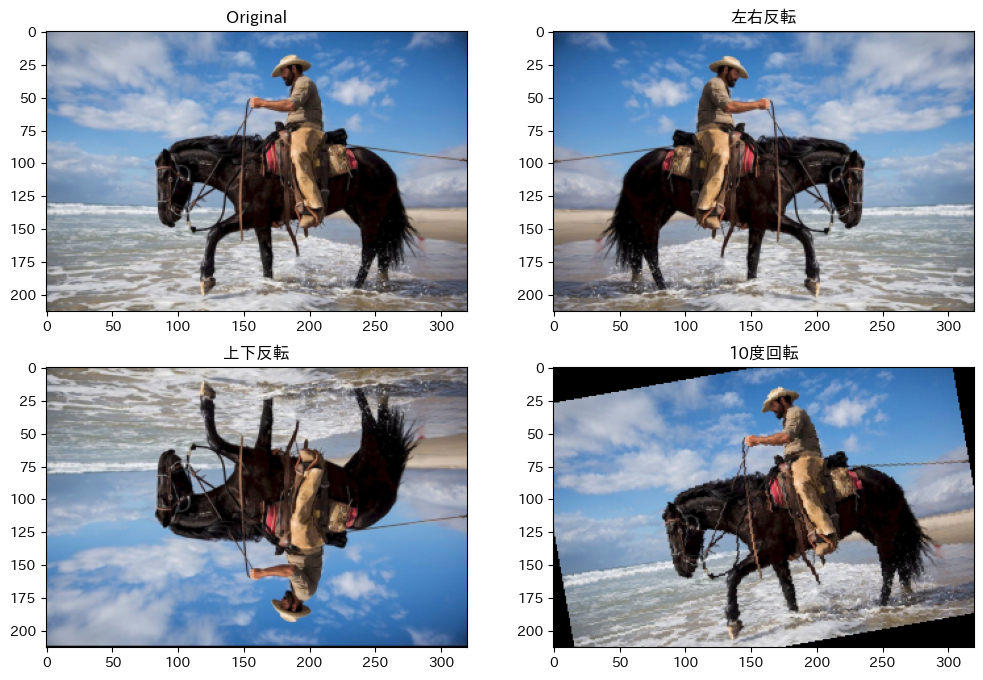

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import japanize_matplotlib


def affine(img: np.ndarray, a: float=1, b: float=0, c: float=0, d: float=1, tx: int = 0, ty: int = 0, adjust=False):
	H, W, C = img.shape

	# 外枠を黒で囲んだ元画像
	surrounded_img = np.zeros((H+2, W+2, C), dtype=np.float32)
	surrounded_img[1:H+1, 1:W+1, :] = img.copy()

	# 出力画像の高さ・幅
	H_out = np.round(H).astype(np.int32)
	W_out = np.round(W).astype(np.int32)
	# print(H_out, W_out)

	y = np.repeat(np.arange(1, H_out+1), W_out).astype(np.int32)
	x = np.tile(np.arange(1, W_out+1), H_out).astype(np.int32)

	# 逆変換で元画像のインデックスを求める
	adbc = a * d - b * c
	x_index = np.round((d * x  - b * y) / adbc).astype(np.int32) - tx
	y_index = np.round((-c * x + a * y) / adbc).astype(np.int32) - ty

	# 変換後の座標の中心とフレームの座標の中心の差を求めて平行移動させる
	if adjust:
		x_center = (x_index.max() + x_index.min()) // 2 - W // 2
		y_center = (y_index.max() + y_index.min()) // 2 - H // 2

		x_index -= x_center
		y_index -= y_center

	# 元画像の配列外を参照する場合は外枠（黒）とする
	x_index = np.minimum(np.maximum(x_index, 0), W+1)
	y_index = np.minimum(np.maximum(y_index, 0), H+1)

	# ファンシーインデックスで取得して3次元配列に変換
	out = surrounded_img[y_index, x_index, :].reshape(H_out, W_out, -1).astype(np.int32)
	
	return out

plt.figure(figsize=(12, 8))

img = io.imread("imgs/cowboy.png")
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img)

img_2 = affine(img, a=-1, b=0, c=0, d=1, adjust=True)
plt.subplot(2, 2, 2)
plt.title('左右反転')
plt.imshow(img_2)


img_3 = affine(img, a=1, b=0, c=0, d=-1, adjust=True)
plt.subplot(2, 2, 3)
plt.title('上下反転')
plt.imshow(img_3)

theta = - np.radians(10.)
img_4 = affine(img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta), adjust=True)
plt.subplot(2, 2, 4)
plt.title('10度回転')
plt.imshow(img_4)

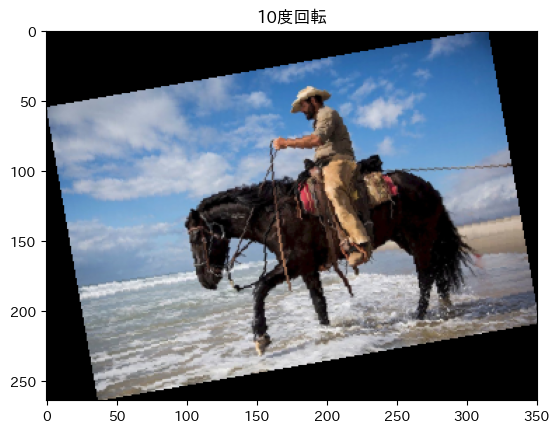

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import japanize_matplotlib


def affine(img: np.ndarray, a: float=1, b: float=0, c: float=0, d: float=1, tx: int = 0, ty: int = 0, adjust=False):
	H, W, C = img.shape

	# 外枠を黒で囲んだ元画像
	surrounded_img = np.zeros((H+2, W+2, C), dtype=np.float32)
	surrounded_img[1:H+1, 1:W+1, :] = img.copy()

	# 出力画像の高さ・幅
	H_out = np.round(H).astype(np.int32) * 2
	W_out = np.round(W).astype(np.int32) * 2
	# print(H_out, W_out)

	y = np.repeat(np.arange(1, H_out+1), W_out).astype(np.int32)
	x = np.tile(np.arange(1, W_out+1), H_out).astype(np.int32)

	# 逆変換で元画像のインデックスを求める
	adbc = a * d - b * c
	x_index = np.round((d * x  - b * y) / adbc).astype(np.int32) - tx
	y_index = np.round((-c * x + a * y) / adbc).astype(np.int32) - ty

	# 変換後の座標の中心とフレームの座標の中心の差を求めて平行移動させる
	if adjust:
		x_center = (x_index.max() + x_index.min()) // 2 - W // 2
		y_center = (y_index.max() + y_index.min()) // 2 - H // 2

		x_index -= x_center
		y_index -= y_center

	# 元画像の配列外を参照する場合は外枠（黒）とする
	x_index = np.minimum(np.maximum(x_index, 0), W+1)
	y_index = np.minimum(np.maximum(y_index, 0), H+1)

	# ファンシーインデックスで取得して3次元配列に変換
	out = surrounded_img[y_index, x_index, :].reshape(H_out, W_out, -1).astype(np.int32)

	img_y, img_x = np.where((out[:,:,0] != 0) & (out[:,:,1] != 0) & (out[:,:,2] != 0))
	out = out[img_y.min(): img_y.max(), img_x.min(): img_x.max(), :]
	
	return out

# plt.figure(figsize=(12, 8))

img = io.imread("imgs/cowboy.png")

theta = - np.radians(10.)
img_4 = affine(img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta), adjust=True)
plt.title('10度回転')
plt.imshow(img_4)